In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from math import sin, cos, sqrt, atan2, radians

import query_helper
import json

# Start by loading db into pandas


In [51]:
df = query_helper.query_to_df('''SELECT * FROM climbs.routes''')
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,"South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder",https://www.mountainproject.com/route/105714722/central-yellow-wall,-103.564,43.8463
1,105714728,Waves,Sport,5.8,4.6,217,2,"South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock",https://www.mountainproject.com/route/105714728/waves,-103.466,43.8865
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,"South Dakota,Custer State Park,Cathedral Spires,Station 13",https://www.mountainproject.com/route/105714731/east-chimney-variation,-103.534,43.8488
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,"South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet",https://www.mountainproject.com/route/105714734/conn-diagonal,-103.568,43.8487
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,"South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo",https://www.mountainproject.com/route/105714737/bolts-for-bobs,-103.469,43.8870


In [52]:
df[df['id']==106875741]

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
13481,106875741,Via Leni 6b,"Sport, Alpine",5.10b,5.0,4,6,"International,Europe,Switzerland,Albigna Valley,Spazzacaldeira",https://www.mountainproject.com/route/106875741/via-leni-6b,9.6383,46.3387


In [53]:
df.tail()

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
36622,118210398,Dead and Bloated,Boulder,V5-6,5.0,1,0,"California,Southern Sierra,San Joaquin River Gorge,Downstream,Dead and Bloated Boulder",https://www.mountainproject.com/route/118210398/dead-and-bloated,-119.555,37.0917
36623,118210488,Unknown #1,Boulder,V0-1,3.0,1,0,"California,Lake Tahoe,I-80 Corridor,Auburn and Grass Valley,Auburn SRA,Tall Green Bridge,Riversi...",https://www.mountainproject.com/route/118210488/unknown-1,-121.036,38.9139
36624,118210496,Unknown #2,Boulder,V1-2,3.0,1,0,"California,Lake Tahoe,I-80 Corridor,Auburn and Grass Valley,Auburn SRA,Tall Green Bridge,Riversi...",https://www.mountainproject.com/route/118210496/unknown-2,-121.036,38.9139
36625,118210504,Unknown #3,Boulder,V1-2,3.0,1,0,"California,Lake Tahoe,I-80 Corridor,Auburn and Grass Valley,Auburn SRA,Tall Green Bridge,Riversi...",https://www.mountainproject.com/route/118210504/unknown-3,-121.036,38.9139
36626,118211517,Mertensia Pillar,"Trad, Ice, Alpine",WI5,4.0,1,1,"Colorado,CO Ice & Mixed,RMNP - Mixed/Ice,Wild Basin,Mertensia Falls",https://www.mountainproject.com/route/118211517/mertensia-pillar,-105.640,40.2210


In [54]:
df.shape

(36627, 11)

# Initial Data  Cleaning

### Add sub location cols

In [55]:
df['location']=df['location'].apply(lambda x: x.split(','))

In [56]:
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,"[South Dakota, Custer State Park, Sylvan Lake, Sylvan Lake Bouldering, Campground Boulder]",https://www.mountainproject.com/route/105714722/central-yellow-wall,-103.564,43.8463
1,105714728,Waves,Sport,5.8,4.6,217,2,"[South Dakota, The Needles Of Rushmore, Mount Rushmore National Memorial, South Seas, Shipyard R...",https://www.mountainproject.com/route/105714728/waves,-103.466,43.8865
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,"[South Dakota, Custer State Park, Cathedral Spires, Station 13]",https://www.mountainproject.com/route/105714731/east-chimney-variation,-103.534,43.8488
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,"[South Dakota, Custer State Park, Sylvan Lake, Outlets, Outer Outlet]",https://www.mountainproject.com/route/105714734/conn-diagonal,-103.568,43.8487
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,"[South Dakota, The Needles Of Rushmore, Mount Rushmore National Memorial, South Seas, Borneo]",https://www.mountainproject.com/route/105714737/bolts-for-bobs,-103.469,43.8870


In [57]:
df['region'] =0
df['area']=0
df['sub_area']=0
df['wall']=0

In [58]:
#determines length of sub location list and splits them into appropriate columns
def split_list(array, length):
    if length ==5:
        if len(array)>=5:
            return ','.join(array[4:])
        else:
            return 0
    if len(array)>= length:
        return array[length-1]
    else:
        return 0
        

In [59]:
#parse area info (note size varies and we only split into 5 sections)
df.region =df.location.apply(lambda x: split_list(x,2))
df.area =df.location.apply(lambda x: split_list(x,3))
df.sub_area =df.location.apply(lambda x:  split_list(x,4))
df.wall =df.location.apply(lambda x:  split_list(x,5))

#then make location state only
df.location = df.location.apply(lambda x: x[0])

In [60]:
#reorder df for readability
df = df[['id',
'name',
'type',
'rating',
'stars',
'starVotes',
'pitches',
'location',
'region',
'area',
'sub_area',
'wall',
'longitude',
'latitude',
'url',
]]
df.head(20)

,id,name,type,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall
1,105714728,Waves,Sport,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs
5,105714740,Solitaire,Sport,5.7,4.1,120,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714740/solitaire
6,105714743,Star Dancer,"Sport, TR",5.8,4.4,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8828,https://www.mountainproject.com/route/105714743/star-dancer
7,105714746,Solo System,"Sport, TR",5.6,3.0,70,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8828,https://www.mountainproject.com/route/105714746/solo-system
8,105714749,Weird Water,Trad,5.7,4.8,89,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8824,https://www.mountainproject.com/route/105714749/weird-water
9,105714752,Patience,Sport,5.8 X,3.9,16,1,South Dakota,Custer State Park,Tenpins/Switchbacks,Pawn,0,-103.536,43.8394,https://www.mountainproject.com/route/105714752/patience


### Breakout Climbing type

In [61]:
df.type.value_counts()

Sport                             12999
Boulder                            9810
Trad                               7363
TR                                 1383
Trad, TR                           1346
Trad, Alpine                        774
Sport, TR                           683
Trad, Sport                         564
Trad, Aid                           276
Boulder, Alpine                     211
Ice                                 159
Sport, Alpine                       133
TR, Boulder                          91
Trad, Ice                            67
Aid                                  66
Snow, Alpine                         57
Trad, Mixed, Ice                     47
Trad, Boulder                        42
Sport, Mixed                         39
Trad, Snow, Alpine                   33
Trad, Sport, TR                      32
Trad, Mixed, Ice, Alpine             31
Trad, TR, Alpine                     29
Trad, Ice, Alpine                    25
Ice, Snow, Alpine                    24


In [62]:
df.isna().sum()

id           0
name         0
type         0
rating       0
stars        0
starVotes    0
pitches      0
location     0
region       0
area         0
sub_area     0
wall         0
longitude    0
latitude     0
url          0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36627 entries, 0 to 36626
Data columns (total 15 columns):
id           36627 non-null int64
name         36627 non-null object
type         36627 non-null object
rating       36627 non-null object
stars        36627 non-null float64
starVotes    36627 non-null int64
pitches      36627 non-null int64
location     36627 non-null object
region       36627 non-null object
area         36627 non-null object
sub_area     36627 non-null object
wall         36627 non-null object
longitude    36627 non-null float64
latitude     36627 non-null float64
url          36627 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 4.2+ MB


In [64]:
#fill in blank types as trad (theres only a few)
df.type = df.type.apply(lambda x: 'Trad' if x=='' else x)

In [65]:
df['Sport'] =0
df['Trad']=0
df['Boulder']=0
df['TR']=0
df['Alpine'] =0
df['Aid']=0
df['Ice']=0
df['Snow'] =0
df['Mixed']=0

In [66]:
df['Sport'] =df['type'].apply(lambda x: 1 if 'Sport' in x else 0)
df['Trad']=df['type'].apply(lambda x: 1 if 'Trad' in x else 0)
df['Boulder']=df['type'].apply(lambda x: 1 if 'Boulder' in x else 0)
df['TR']=df['type'].apply(lambda x: 1 if 'TR' in x else 0)
df['Alpine'] =df['type'].apply(lambda x: 1 if 'Alpine' in x else 0)
df['Aid']=df['type'].apply(lambda x: 1 if 'Aid' in x else 0)
df['Ice']=df['type'].apply(lambda x: 1 if 'Ice' in x else 0)
df['Snow'] =df['type'].apply(lambda x: 1 if 'Snow' in x else 0)
df['Mixed']=df['type'].apply(lambda x: 1 if 'Mixed' in x else 0)

In [67]:
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0
1,105714728,Waves,Sport,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0


In [68]:
df.drop(columns='type',inplace=True)

### Look at pitches

In [69]:
df.pitches.value_counts()

 1     17043
 0     15810
 2      1476
 3       757
 4       515
 5       308
 6       202
 8       115
 7       111
 9        64
 10       60
 11       35
 12       33
 15       20
 14       11
 13       10
 16        9
 19        5
 17        5
-1         5
 18        4
 20        4
 22        4
 26        3
 23        3
 21        2
 35        2
 30        2
-9         1
-7         1
 27        1
 36        1
 28        1
 29        1
-2         1
 33        1
 31        1
Name: pitches, dtype: int64

In [70]:
pd.options.display.max_colwidth = 100

In [71]:
df[(df.pitches==0) & (df.Boulder==0)]

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed
7,105714746,Solo System,5.6,3.0,70,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.4620,43.8828,https://www.mountainproject.com/route/105714746/solo-system,1,0,0,1,0,0,0,0,0
45,105714992,Mooshy Monster Farts,5.12a,4.5,4,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Monster North,Monster Gully",-103.4620,43.8833,https://www.mountainproject.com/route/105714992/mooshy-monster-farts,1,0,0,1,0,0,0,0,0
46,105714995,Valdez Overhang,5.9,4.4,85,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Chopping Block,Chopping Block,-103.4690,43.8854,https://www.mountainproject.com/route/105714995/valdez-overhang,1,0,0,1,0,0,0,0,0
67,105715277,Evarete,5.7,3.9,23,0,South Dakota,Custer State Park,Sylvan Lake,Outlets,Dam - Back Side,-103.5660,43.8475,https://www.mountainproject.com/route/105715277/evarete,1,0,0,0,0,0,0,0,0
84,105715457,Aging Gracefully,5.7,3.8,30,0,South Dakota,Custer State Park,Sylvan Lake,Outlets,Old People's Dome,-103.5690,43.8491,https://www.mountainproject.com/route/105715457/aging-gracefully,1,1,0,0,0,0,0,0,0
95,105715565,Wisconson Beef,5.10a,3.6,39,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Chopping Block,Cleaver,-103.4690,43.8853,https://www.mountainproject.com/route/105715565/wisconson-beef,1,0,0,0,0,0,0,0,0
124,105717301,Death Of American Democracy,5.10 A3-4 X,4.7,3,0,Utah,Moab Area,Fisher Towers,Kingfisher,0,-109.3030,38.7227,https://www.mountainproject.com/route/105717301/death-of-american-democracy,0,0,0,0,0,1,0,0,0
125,105717304,Colorado Northeast Ridge,5.8 C2,4.1,95,0,Utah,Moab Area,Fisher Towers,Kingfisher,0,-109.3030,38.7227,https://www.mountainproject.com/route/105717304/colorado-northeast-ridge,0,0,0,0,0,1,0,0,0
128,105717316,Robbins Route,5.6 A2 R,4.3,3,0,Utah,Moab Area,Valley of the Gods/Mexican Hat,Mexican Hat,0,-109.8490,37.1736,https://www.mountainproject.com/route/105717316/robbins-route,0,0,0,0,0,1,0,0,0
135,105717388,Sundevil Chimney,5.9 A3,5.0,7,0,Utah,Moab Area,Fisher Towers,The Titan,0,-109.2990,38.7174,https://www.mountainproject.com/route/105717388/sundevil-chimney,0,0,0,0,0,1,0,0,0


In [72]:
def pitches_wo_boulders(row):
    if (row['pitches']==0)&(row['Boulder']==0):
        return 1
    else:
        return row['pitches']
    

In [73]:
#change all non boulders with zero to 1 pitch
df.pitches =df.apply(pitches_wo_boulders, axis=1)

In [74]:
# change negative pitch counts to 1
df.pitches =df.pitches.apply(lambda x: 1 if x<0 else x)

In [75]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0


### Clean Difficulity Rating

In [76]:
#start by making dict of grades/ratings
diff_grade = {'Rope': ['3rd',
  '4th',
  'Easy 5th',
  '5.0',
  '5.1',
  '5.2',
  '5.3',
  '5.4',
  '5.5',
  '5.6',
  '5.7',
  '5.7+',
  '5.8-',
  '5.8',
  '5.8+',
  '5.9-',
  '5.9',
  '5.9+',
  '5.10a',
  '5.10-',
  '5.10a/b',
  '5.10b',
  '5.10',
  '5.10b/c',
  '5.10c',
  '5.10+',
  '5.10c/d',
  '5.10d',
  '5.11a',
  '5.11-',
  '5.11a/b',
  '5.11b',
  '5.11',
  '5.11b/c',
  '5.11c',
  '5.11+',
  '5.11c/d',
  '5.11d',
  '5.12a',
  '5.12-',
  '5.12a/b',
  '5.12b',
  '5.12',
  '5.12b/c',
  '5.12c',
  '5.12+',
  '5.12c/d',
  '5.12d',
  '5.13a',
  '5.13-',
  '5.13a/b',
  '5.13b',
  '5.13',
  '5.13b/c',
  '5.13c',
  '5.13+',
  '5.13c/d',
  '5.13d',
  '5.14a',
  '5.14-',
  '5.14a/b',
  '5.14b',
  '5.14',
  '5.14b/c',
  '5.14c',
  '5.14+',
  '5.14c/d',
  '5.14d',
  '5.15a',
  '5.15-',
  '5.15a/b',
  '5.15b',
  '5.15',
  '5.15c',
  '5.15+',
  '5.15c/d',
  '5.15d'],
 'Boulder': ['V-easy',
  'V0-',
  'V0',
  'V0+',
  'V0-1',
  'V1-',
  'V1',
  'V1+',
  'V1-2',
  'V2-',
  'V2',
  'V2+',
  'V2-3',
  'V3-',
  'V3',
  'V3+',
  'V3-4',
  'V4-',
  'V4',
  'V4+',
  'V4-5',
  'V5-',
  'V5',
  'V5+',
  'V5-6',
  'V6-',
  'V6',
  'V6+',
  'V6-7',
  'V7-',
  'V7',
  'V7+',
  'V7-8',
  'V8-',
  'V8',
  'V8+',
  'V8-9',
  'V9-',
  'V9',
  'V9+',
  'V9-10',
  'V10-',
  'V10',
  'V10+',
  'V10-11',
  'V11-',
  'V11',
  'V11+',
  'V11-12',
  'V12-',
  'V12',
  'V12+',
  'V12-13',
  'V13-',
  'V13',
  'V13+',
  'V13-14',
  'V14-',
  'V14',
  'V14+',
  'V14-15',
  'V15-',
  'V15',
  'V15+',
  'V15-16',
  'V16-',
  'V16',
  'V16+',
  'V16-17',
  'V17-',
  'V17'],
 'Ice': ['WI1',
  'WI2-',
  'WI2',
  'WI2+',
  'WI2-3',
  'WI3-',
  'WI3',
  'WI3+',
  'WI3-4',
  'WI4-',
  'WI4',
  'WI4+',
  'WI4-5',
  'WI5-',
  'WI5',
  'WI5+',
  'WI5-6',
  'WI6-',
  'WI6',
  'WI6+',
  'WI6-7',
  'WI7-',
  'WI7',
  'WI7+',
  'WI7-8',
  'WI8-',
  'WI8',
  'AI1',
  'AI1-2',
  'AI2',
  'AI2-3',
  'AI3',
  'AI3-4',
  'AI4',
  'AI4-5',
  'AI5',
  'AI5-6',
  'AI6'],
 'Aid': ['C0',
  'A0',
  'C0+',
  'A0+',
  'C0-1',
  'A0-1',
  'C1-',
  'A1-',
  'C1',
  'A1',
  'C1+',
  'A1+',
  'C1-2',
  'A1-2',
  'C2-',
  'A2-',
  'C2',
  'A2',
  'C2+',
  'A2+',
  'C2-3',
  'A2-3',
  'C3-',
  'A3-',
  'C3',
  'A3',
  'C3+',
  'A3+',
  'C3-4',
  'A3-4',
  'C4-',
  'A4-',
  'C4',
  'A4',
  'C4+',
  'A4+',
  'C4-5',
  'A4-5',
  'C5-',
  'A5-',
  'C5',
  'A5',
  'C5+',
  'A5+'],
 'Mixed': ['M1',
  'M1+',
  'M1-2',
  'M2-',
  'M2',
  'M2+',
  'M2-3',
  'M3-',
  'M3',
  'M3+',
  'M3-4',
  'M4-',
  'M4',
  'M4+',
  'M4-5',
  'M5-',
  'M5',
  'M5+',
  'M5-6',
  'M6-',
  'M6',
  'M6+',
  'M6-7',
  'M7-',
  'M7',
  'M7+',
  'M7-8',
  'M8-',
  'M8',
  'M8+',
  'M8-9',
  'M9-',
  'M9',
  'M9+',
  'M9-10',
  'M10-',
  'M10',
  'M10+',
  'M10-11',
  'M11-',
  'M11',
  'M11+',
  'M12-',
  'M12',
  'M12+',
  'M13-',
  'M13',
  'M13+'],
 'Snow': ['Easy Snow', 'Mod. Snow', 'Steep Snow'],
 'Safety': [
 'PG13',
  'R',
  'X'],
 'Mountaineering': ['I', 'II', 'III', 'IV', 'V', 'VI']}

#### Feature Engineer danger column

In [77]:
#add danger column
df['danger'] = 'G'

In [78]:
#parses our difficulty rating and specified substring
#returns grade if boulder or rope passed as catagory
def get_grade_sub(string, catagory):
    words = string.split()
    for word in words:
        if word in diff_grade[catagory]:
            return word
        
    #else we couldn't find the danger grade so return 0 
    if catagory == "Safety":
        return "G"
    #else we couldn't find the difficulty grade so return 0(note this is different from above G rating)
    if (catagory == 'Rope') | (catagory == 'Boulder'):
        return 0

In [79]:
df['danger'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Safety'))

In [80]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,R
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,G
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,G
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,G
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,G


#### Add diff_rating for Rope and Bouldering 

In [81]:
df['rope_grade'] = 0
df['boulder_grade'] = 0

In [82]:
df['rope_grade'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Rope'))
df['boulder_grade'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Boulder'))

In [83]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,R,0,V3
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,G,5.8,0
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,G,5.7,0
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,G,5.7,0
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,G,5.8,0


In [84]:
###if i want a grade scale use enumerate through diff_grade dict and assign i

#### Give Ratings Numeric Ranges

In [85]:
### make ordinal columns for rope_grade, boulder_grade and danger
######SHOULD make this more robust in future############################################
def get_rope_grades(grade, catagory):
    for i,match in enumerate(diff_grade[catagory]):
        if match == str(grade):
            return i+1
    return 0    

#### Make grade columns numeric and add in_range column (defaults to True)

In [86]:
df['rating'] =df['rating'].apply(lambda x: '_' if x=='' else x)
df['rope_grade']=df['rating'].apply(lambda x: get_rope_grades(x.split()[0],'Rope'))
df['boulder_grade']=df['rating'].apply(lambda x: get_rope_grades(x.split()[0],'Boulder'))
df['danger']=df['rating'].apply(lambda x: get_rope_grades(x.split()[-1],'Safety'))
df['in_range'] = 1

df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,2,0,15,1
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,0,14,0,1
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,0,11,0,1
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,0,11,0,1
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,0,14,0,1


In [88]:
df[df.rating=='']

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range


# Join df with route_description df from AWS DB

In [89]:
#start by making dict of grades/ratings
diff_grade = {'Rope': ['3rd',
  '4th',
  'Easy 5th',
  '5.0',
  '5.1',
  '5.2',
  '5.3',
  '5.4',
  '5.5',
  '5.6',
  '5.7',
  '5.7+',
  '5.8-',
  '5.8',
  '5.8+',
  '5.9-',
  '5.9',
  '5.9+',
  '5.10a',
  '5.10-',
  '5.10a/b',
  '5.10b',
  '5.10',
  '5.10b/c',
  '5.10c',
  '5.10+',
  '5.10c/d',
  '5.10d',
  '5.11a',
  '5.11-',
  '5.11a/b',
  '5.11b',
  '5.11',
  '5.11b/c',
  '5.11c',
  '5.11+',
  '5.11c/d',
  '5.11d',
  '5.12a',
  '5.12-',
  '5.12a/b',
  '5.12b',
  '5.12',
  '5.12b/c',
  '5.12c',
  '5.12+',
  '5.12c/d',
  '5.12d',
  '5.13a',
  '5.13-',
  '5.13a/b',
  '5.13b',
  '5.13',
  '5.13b/c',
  '5.13c',
  '5.13+',
  '5.13c/d',
  '5.13d',
  '5.14a',
  '5.14-',
  '5.14a/b',
  '5.14b',
  '5.14',
  '5.14b/c',
  '5.14c',
  '5.14+',
  '5.14c/d',
  '5.14d',
  '5.15a',
  '5.15-',
  '5.15a/b',
  '5.15b',
  '5.15',
  '5.15c',
  '5.15+',
  '5.15c/d',
  '5.15d'],
 'Boulder': ['V-easy',
  'V0-',
  'V0',
  'V0+',
  'V0-1',
  'V1-',
  'V1',
  'V1+',
  'V1-2',
  'V2-',
  'V2',
  'V2+',
  'V2-3',
  'V3-',
  'V3',
  'V3+',
  'V3-4',
  'V4-',
  'V4',
  'V4+',
  'V4-5',
  'V5-',
  'V5',
  'V5+',
  'V5-6',
  'V6-',
  'V6',
  'V6+',
  'V6-7',
  'V7-',
  'V7',
  'V7+',
  'V7-8',
  'V8-',
  'V8',
  'V8+',
  'V8-9',
  'V9-',
  'V9',
  'V9+',
  'V9-10',
  'V10-',
  'V10',
  'V10+',
  'V10-11',
  'V11-',
  'V11',
  'V11+',
  'V11-12',
  'V12-',
  'V12',
  'V12+',
  'V12-13',
  'V13-',
  'V13',
  'V13+',
  'V13-14',
  'V14-',
  'V14',
  'V14+',
  'V14-15',
  'V15-',
  'V15',
  'V15+',
  'V15-16',
  'V16-',
  'V16',
  'V16+',
  'V16-17',
  'V17-',
  'V17'],
 'Ice': ['WI1',
  'WI2-',
  'WI2',
  'WI2+',
  'WI2-3',
  'WI3-',
  'WI3',
  'WI3+',
  'WI3-4',
  'WI4-',
  'WI4',
  'WI4+',
  'WI4-5',
  'WI5-',
  'WI5',
  'WI5+',
  'WI5-6',
  'WI6-',
  'WI6',
  'WI6+',
  'WI6-7',
  'WI7-',
  'WI7',
  'WI7+',
  'WI7-8',
  'WI8-',
  'WI8',
  'AI1',
  'AI1-2',
  'AI2',
  'AI2-3',
  'AI3',
  'AI3-4',
  'AI4',
  'AI4-5',
  'AI5',
  'AI5-6',
  'AI6'],
 'Aid': ['C0',
  'A0',
  'C0+',
  'A0+',
  'C0-1',
  'A0-1',
  'C1-',
  'A1-',
  'C1',
  'A1',
  'C1+',
  'A1+',
  'C1-2',
  'A1-2',
  'C2-',
  'A2-',
  'C2',
  'A2',
  'C2+',
  'A2+',
  'C2-3',
  'A2-3',
  'C3-',
  'A3-',
  'C3',
  'A3',
  'C3+',
  'A3+',
  'C3-4',
  'A3-4',
  'C4-',
  'A4-',
  'C4',
  'A4',
  'C4+',
  'A4+',
  'C4-5',
  'A4-5',
  'C5-',
  'A5-',
  'C5',
  'A5',
  'C5+',
  'A5+'],
 'Mixed': ['M1',
  'M1+',
  'M1-2',
  'M2-',
  'M2',
  'M2+',
  'M2-3',
  'M3-',
  'M3',
  'M3+',
  'M3-4',
  'M4-',
  'M4',
  'M4+',
  'M4-5',
  'M5-',
  'M5',
  'M5+',
  'M5-6',
  'M6-',
  'M6',
  'M6+',
  'M6-7',
  'M7-',
  'M7',
  'M7+',
  'M7-8',
  'M8-',
  'M8',
  'M8+',
  'M8-9',
  'M9-',
  'M9',
  'M9+',
  'M9-10',
  'M10-',
  'M10',
  'M10+',
  'M10-11',
  'M11-',
  'M11',
  'M11+',
  'M12-',
  'M12',
  'M12+',
  'M13-',
  'M13',
  'M13+'],
 'Snow': ['Easy Snow', 'Mod. Snow', 'Steep Snow'],
 'Safety': [
 'PG13',
  'R',
  'X'],
 'Mountaineering': ['I', 'II', 'III', 'IV', 'V', 'VI']}

In [92]:
df.set_index('id', inplace=True)
df.head()

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,2,0,15,1
105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,0,14,0,1
105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,0,11,0,1
105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,0,11,0,1
105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,0,14,0,1


### Import NLP Data and join to main df

In [93]:
df_nlp = query_helper.query_to_df('SELECT * FROM climbs.route_description;')
df_nlp.set_index('id', inplace=True)
df_nlp.rename(columns={'info':'infos'}, inplace=True)

df_nlp.head()

,infos
id,
105714722,The Central Yellow Wall is a classic must-do problem. The Yellow Wall is the highest wall of th...
105714728,Waves is one of the best easy routes at Rushmore. Begin on the left side of a ledge on the face ...
105714731,Start at the base of the easy chimney on the east face. Climb to the top of the chimney and sin...
105714734,This is one of the most classic 5.7 routes that I have ever done. Hike to the field north of Out...
105714737,"The rightmost line on the rock (see directions under the rock entry), just up the small hill. ..."


In [95]:
df = df.join(df_nlp)
df.head()

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range,infos
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,2,0,15,1,The Central Yellow Wall is a classic must-do problem. The Yellow Wall is the highest wall of th...
105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,0,14,0,1,Waves is one of the best easy routes at Rushmore. Begin on the left side of a ledge on the face ...
105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,0,11,0,1,Start at the base of the easy chimney on the east face. Climb to the top of the chimney and sin...
105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,0,11,0,1,This is one of the most classic 5.7 routes that I have ever done. Hike to the field north of Out...
105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,0,14,0,1,"The rightmost line on the rock (see directions under the rock entry), just up the small hill. ..."


## Add columns for route description types from NLP

In [107]:
#all the keywords we search for
key_words = ['slab', 'traverse', 'roof', 'corner', 'crack', 'face','flake', 'finger', 'fingers',
             'hand', 'hands', 'arch', 'balancy', 'balance', 'jug', 'squeeze', 'mantel', 'sustained',  
             'ramp', 'overhung', 'dihedral', 'sporty', 'heady', 'pump', 'pumpy', 'technical',
             'run out', 'mental', 'well protected', 'chimney', 'offwidth', 'stem', 'arete', 'exposed', 'exposure',
             'crimp','crimpy', 'vertical', 'slabby', 'cave', 'steep', 'bouldery', 'powerful','runout','run-out']

In [108]:
#the above key words will be mapped to the below subset of words
col_key_words = ['slab', 'traverse', 'roof', 'corner', 'crack', 'hand', 'face','flake', 'fingers',
                 'jug', 'exposed', 'dihedral', 'sustained', 'technical','run out', 'well protected',
                 'chimney', 'offwidth', 'stem', 'arete','crimp', 'vertical', 'powerful']


In [109]:
#used to check if all words had been mapped properly
synonym =[]
for word in key_words:
    if word in col_key_words:
        pass
    else:
        synonym.append(word)
synonym

['finger',
 'hands',
 'arch',
 'balancy',
 'balance',
 'squeeze',
 'mantel',
 'ramp',
 'overhung',
 'sporty',
 'heady',
 'pump',
 'pumpy',
 'mental',
 'exposure',
 'crimpy',
 'slabby',
 'cave',
 'steep',
 'bouldery',
 'runout',
 'run-out']

In [103]:
sym_map = {
 'finger':'fingers',
 'hands':'hand',
 'arch': 'roof',
 'balancy':'technical',
 'heady':'run out',
 'runout':'run out',
 'run-out':'run out',
 'pumpy':'sustained',
 'exposure':'exposed',
 'crimpy':'crimp',
 'slabby':'slab',
 'bouldery':'powerful',
 'cave':'roof',
 'overhung':'roof',
 'squeeze':'chimney',
 'steep':'vertical',
 'balance':'technical',
 'mental':'run out',
 'ramp':'slab',
 'mantel':'technical',
 'sporty':'well protected',
 'pump':'sustained',
 'jam':'crack'
}

#### Start by setting all columns to zero

In [110]:
for adj in col_key_words:
    df[adj]=0
df.head()

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range,infos,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,2,0,15,1,The Central Yellow Wall is a classic must-do problem. The Yellow Wall is the highest wall of th...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,0,14,0,1,Waves is one of the best easy routes at Rushmore. Begin on the left side of a ledge on the face ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,0,11,0,1,Start at the base of the easy chimney on the east face. Climb to the top of the chimney and sin...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,0,11,0,1,This is one of the most classic 5.7 routes that I have ever done. Hike to the field north of Out...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,0,14,0,1,"The rightmost line on the rock (see directions under the rock entry), just up the small hill. ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
df.shape

(36627, 50)

#### For each col assign 1 if col word found in description


In [112]:
for word in col_key_words:
    df[word] = df['infos'].apply(lambda x: 1 if word in str(x) else 0)

In [113]:
#take care to account for synonyms
for k,v in sym_map.items():
    df[v] = df['infos'].apply(lambda x: 1 if k in str(x) else 0)

In [115]:
for word in col_key_words:
    print(df[word].value_counts())

0    35007
1     1620
Name: slab, dtype: int64
0    32756
1     3871
Name: traverse, dtype: int64
0    36258
1      369
Name: roof, dtype: int64
0    30268
1     6359
Name: corner, dtype: int64
0    34970
1     1657
Name: crack, dtype: int64
0    29419
1     7208
Name: hand, dtype: int64
0    24481
1    12146
Name: face, dtype: int64
0    33040
1     3587
Name: flake, dtype: int64
0    33265
1     3362
Name: fingers, dtype: int64
0    31418
1     5209
Name: jug, dtype: int64
0    36155
1      472
Name: exposed, dtype: int64
0    33961
1     2666
Name: dihedral, dtype: int64
0    35314
1     1313
Name: sustained, dtype: int64
0    36237
1      390
Name: technical, dtype: int64
0    36452
1      175
Name: run out, dtype: int64
0    36506
1      121
Name: well protected, dtype: int64
0    36228
1      399
Name: chimney, dtype: int64
0    36043
1      584
Name: offwidth, dtype: int64
0    33498
1     3129
Name: stem, dtype: int64
0    31683
1     4944
Name: arete, dtype: int64
0    36147
1

# Write df to csv for ML models

In [133]:
features = df.loc[:,['stars', 'pitches', 'Sport', 'Trad', 'Boulder', 'TR', 'Alpine', 'Aid',
       'Ice', 'Snow', 'Mixed', 'danger', 'rope_grade', 'boulder_grade', 'slab', 'traverse', 'roof', 
                'corner', 'crack', 'hand', 'face','flake', 'fingers',
                 'jug', 'exposed', 'dihedral', 'sustained', 'technical','run out', 'well protected',
                 'chimney', 'offwidth', 'stem', 'arete','crimp', 'vertical', 'powerful']]

In [134]:
#saves features (unscaled)
features.to_csv('data/features_data_1.1.csv')
#saves entire cleaned df
df.to_csv('data/df.csv')


# General EDA


### Load feature data for EDA

In [135]:
sns.set(font_scale=2)

In [136]:
df_eda = pd.read_csv('data/features_data_1.1.csv', index_col='id')
# df_eda.drop(columns=['Unnamed: 0'],inplace=True)
df_eda.head()

,stars,pitches,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,4.4,0,0,0,1,1,0,0,0,0,0,2,0,15,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714728,4.6,2,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
105714731,4.1,2,0,1,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714734,4.9,3,0,1,0,0,0,0,0,0,0,0,11,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
105714737,3.5,1,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
df_eda.drop(columns=['stars', 'pitches','rope_grade','boulder_grade'],inplace=True)
df_eda.head()

,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714728,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
105714731,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714734,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
105714737,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
df_eda.columns.values

array(['Sport', 'Trad', 'Boulder', 'TR', 'Alpine', 'Aid', 'Ice', 'Snow',
       'Mixed', 'danger', 'slab', 'traverse', 'roof', 'corner', 'crack',
       'hand', 'face', 'flake', 'fingers', 'jug', 'exposed', 'dihedral',
       'sustained', 'technical', 'run out', 'well protected', 'chimney',
       'offwidth', 'stem', 'arete', 'crimp', 'vertical', 'powerful'],
      dtype=object)

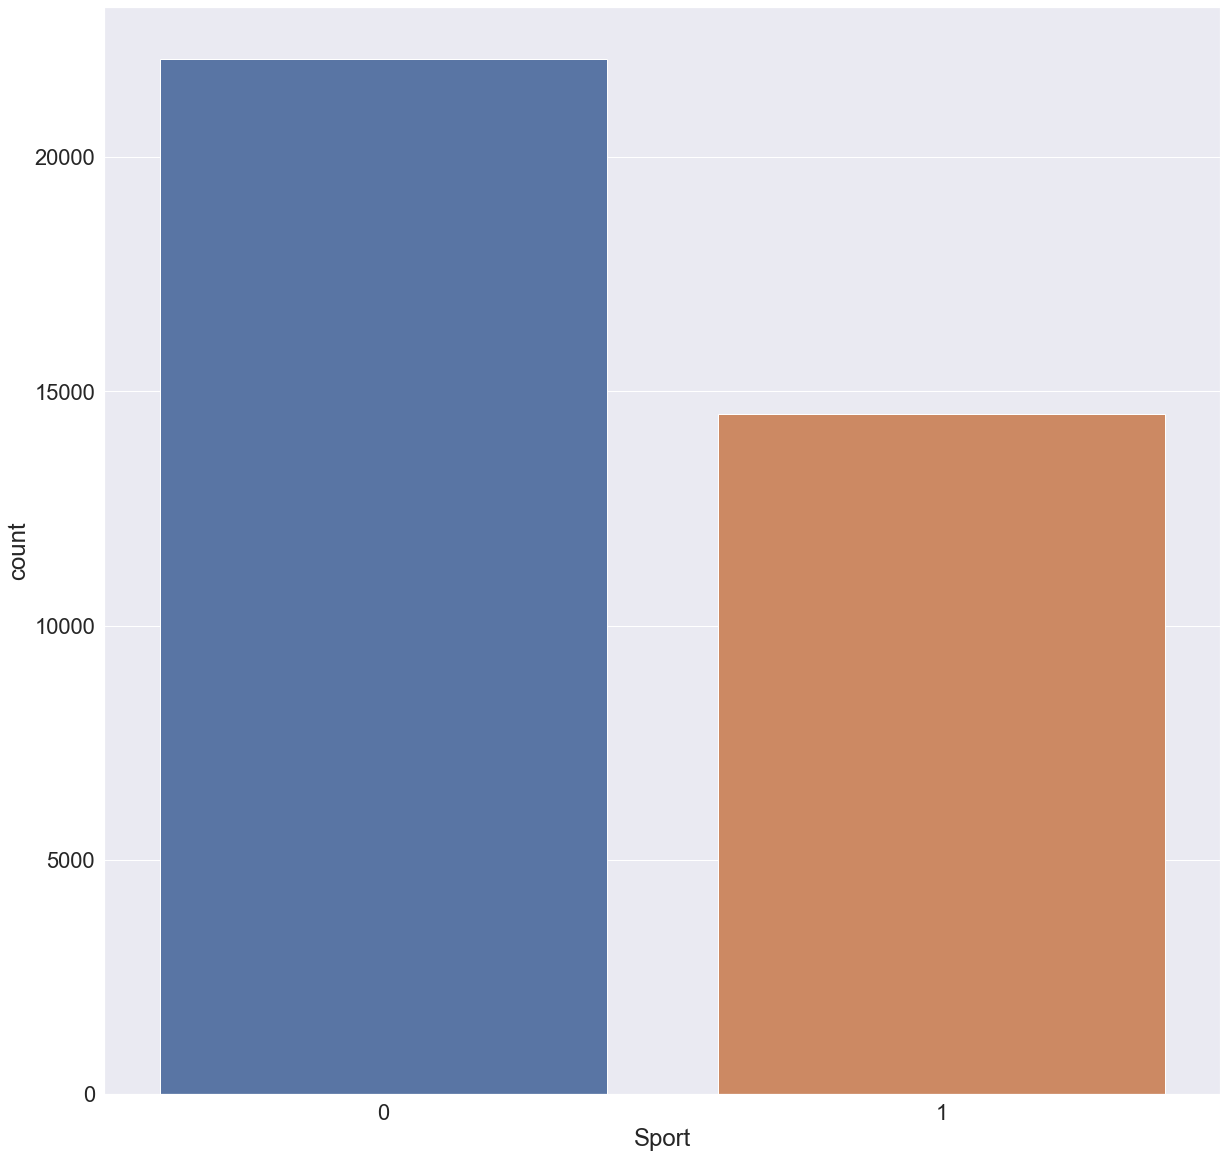

In [139]:
plt.figure(figsize=(20,20))
sns.countplot(df_eda['Sport'])#, 'Trad', 'Boulder', 'TR']])

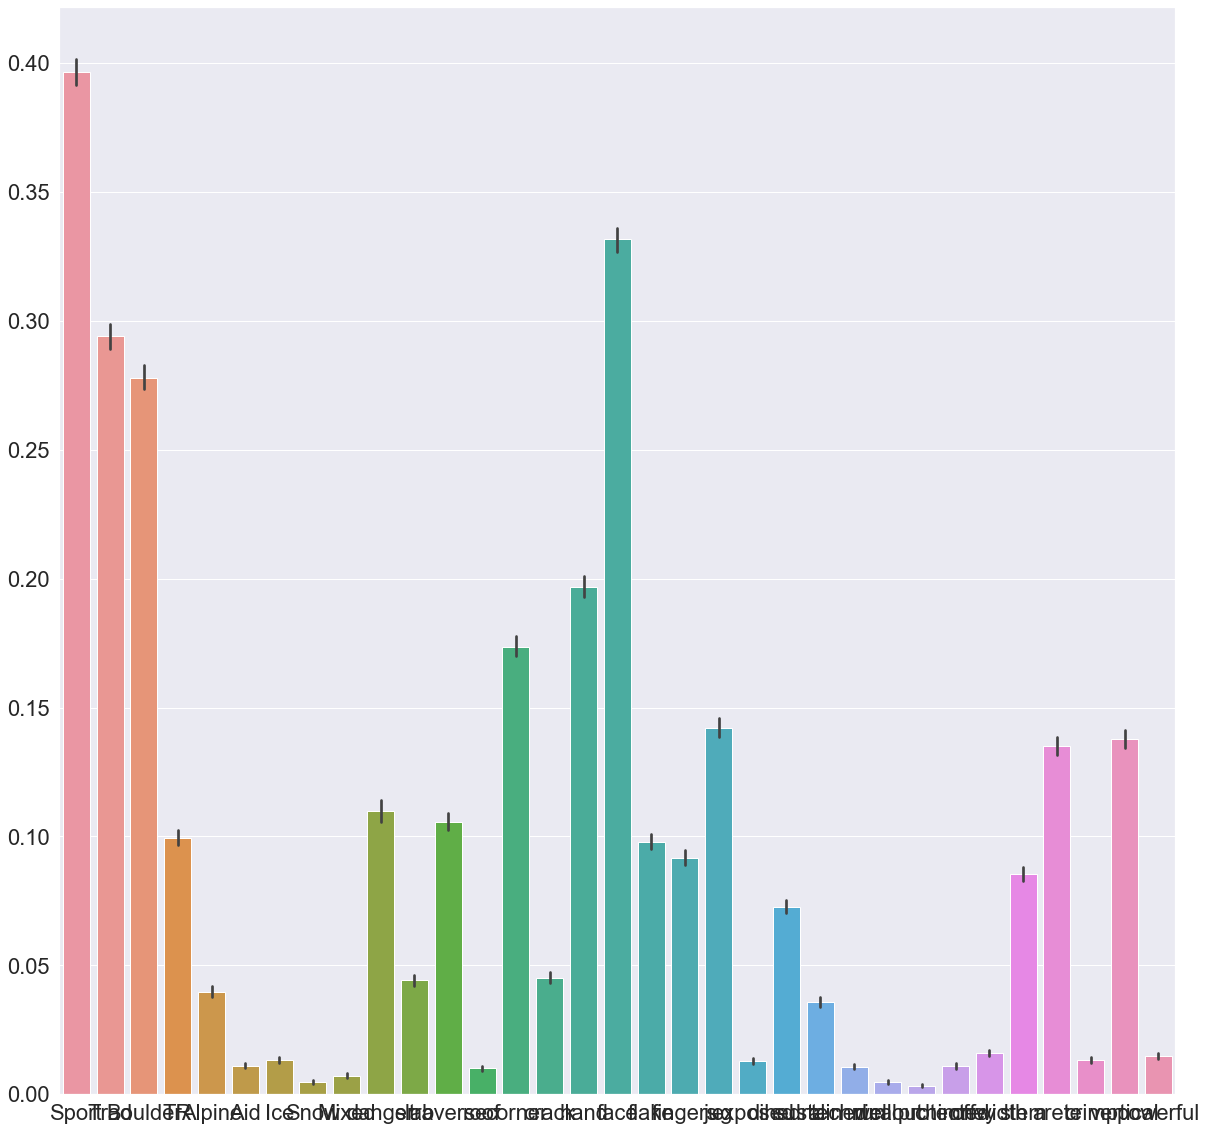

In [140]:
plt.figure(figsize=(20,20))
sns.barplot(data=df_eda)

### Climb Features Distribution

In [165]:
# df_graph = pd.melt(df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']])
df_graph = df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']]

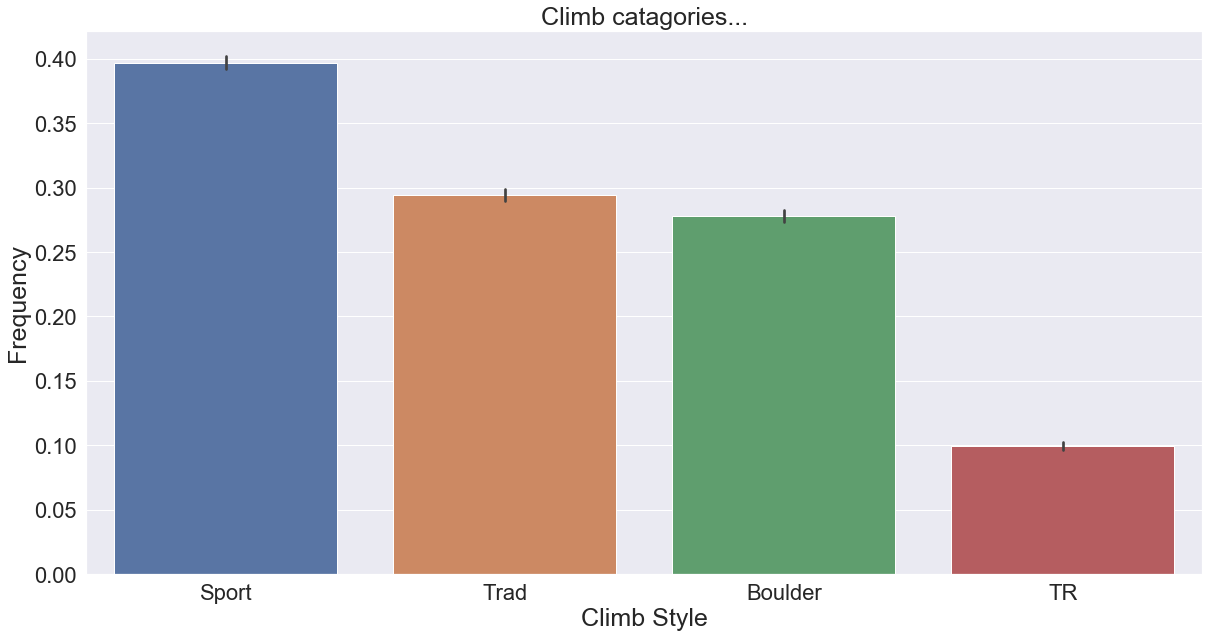

In [166]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df_graph)
plt.title('Climb catagories...',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Frequency',fontsize = 25)
# plt.legend(['No','Yes'])
# plt.set_xlabel(fontsize=20);
plt.savefig('figures/climb_type')

In [167]:
# df_graph = pd.melt(df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']])
df_graph = df_eda.loc[:,col_key_words]

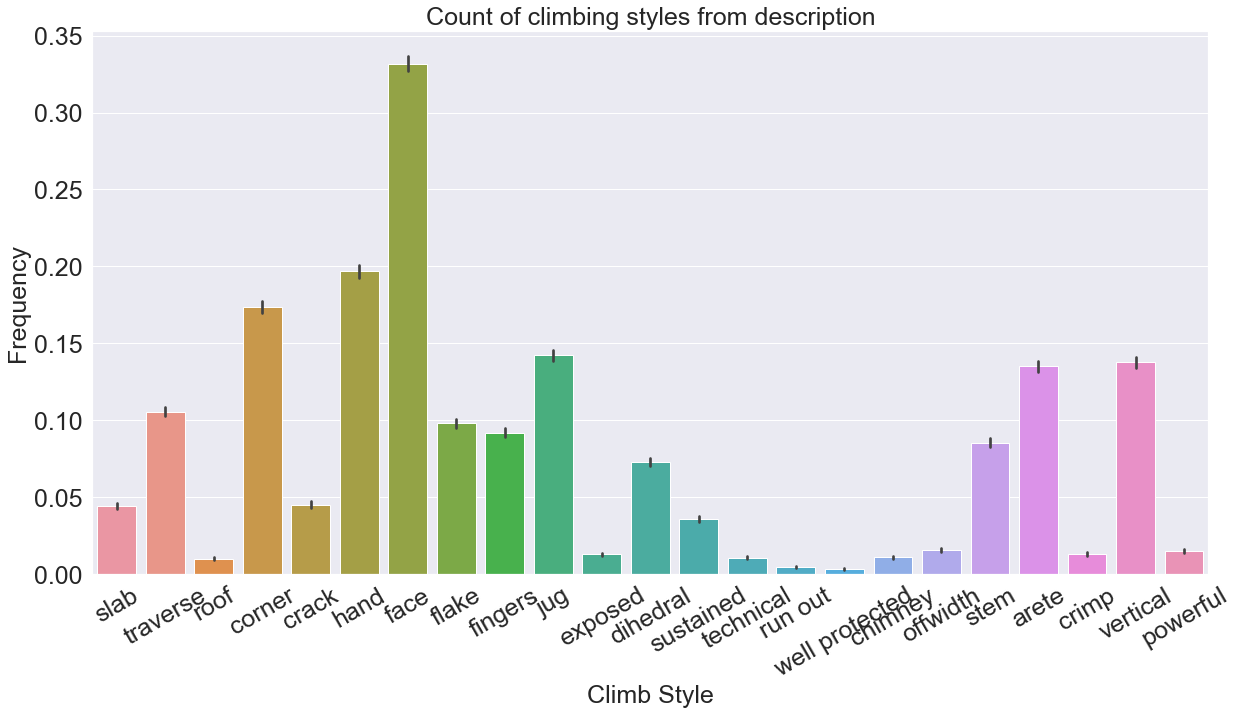

In [168]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df_graph)
plt.title('Count of climbing styles from description',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Frequency',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,fontsize = 25)
ax.tick_params(axis="y", labelsize=25)
plt.savefig('figures/climb_style_type.png')

In [169]:
df_graph = pd.melt(df_eda.loc[:,col_key_words])

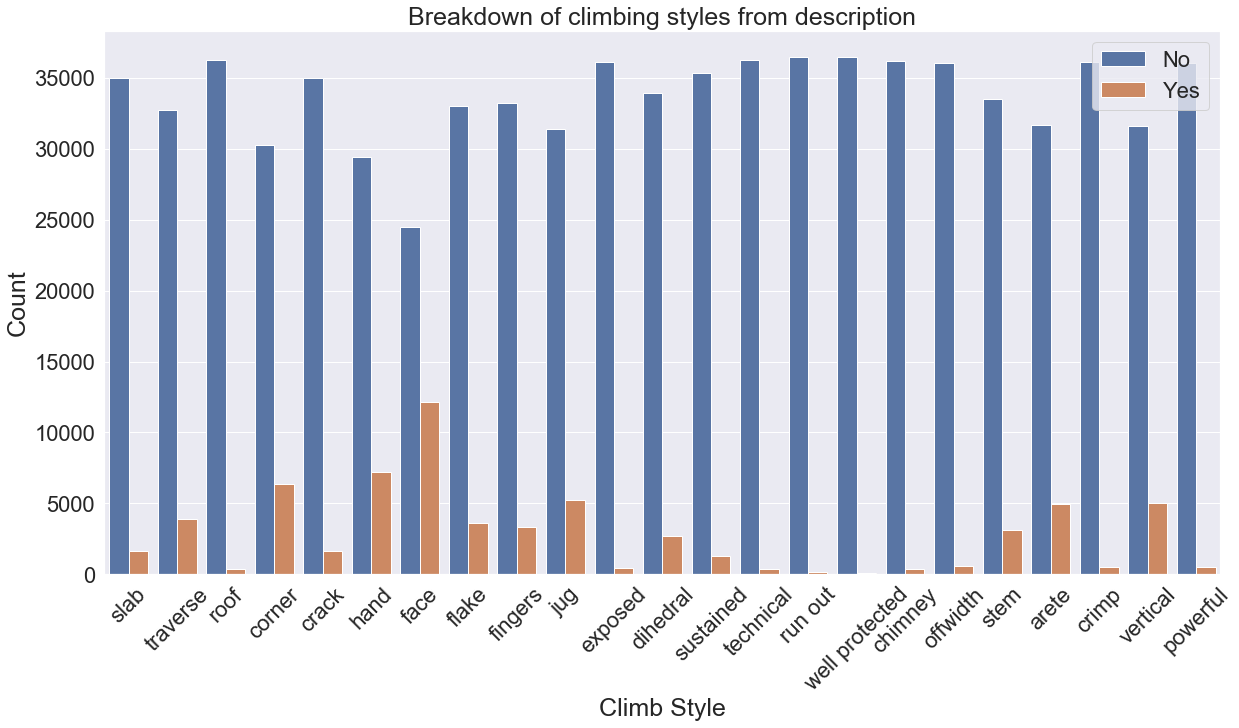

In [170]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x="variable", hue="value", data=df_graph)
plt.title('Breakdown of climbing styles from description',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.legend(['No','Yes'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig('figures/climb_description_type')

In [171]:
# sns.factorplot(x='variable', y='value', data=df, kind='bar')

In [172]:
df[df.rating.isna()]

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range,infos,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [173]:
df.describe()

,stars,starVotes,pitches,longitude,latitude,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
count,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.0,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000,36627.000000
mean,3.688970,25.370383,1.047288,-105.669822,39.137759,0.396675,0.294073,0.277992,0.099571,0.039834,0.011057,0.013378,0.004887,0.007208,0.109728,17.553854,4.709832,1.0,0.044230,0.105687,0.010075,0.173615,0.045240,0.196795,0.331613,0.097933,0.091790,0.142217,0.012887,0.072788,0.035848,0.010648,0.004778,0.003304,0.010894,0.015945,0.085429,0.134982,0.013105,0.137631,0.014880
std,0.818299,59.697772,1.522722,16.387272,3.901110,0.489214,0.455631,0.448015,0.299432,0.195572,0.104573,0.114889,0.069738,0.084593,0.421142,14.999372,9.564043,0.0,0.205608,0.307441,0.099866,0.378783,0.207833,0.397581,0.470799,0.297228,0.288734,0.349278,0.112787,0.259791,0.185913,0.102639,0.068958,0.057382,0.103804,0.125263,0.279523,0.341709,0.113726,0.344517,0.121073
min,0.000000,0.000000,0.000000,-124.353000,-33.509300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100000,1.000000,0.000000,-118.571000,36.994500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,5.000000,1.000000,-110.720000,38.918600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.100000,24.000000,1.000000,-105.109000,41.187500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,3.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1715.000000,36.000000,150.266000,51.341600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,72.000000,71.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


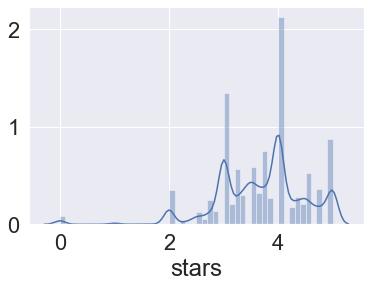

In [150]:
sns.distplot(df['stars'])

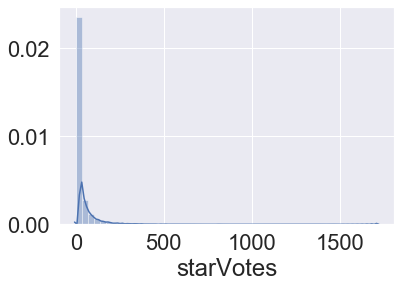

In [151]:
sns.distplot(df['starVotes'])

In [152]:
df['pitches'].value_counts()
# plt.xlim(0, 30)     # set the xlim to left, right

1     23019
0      9842
2      1476
3       757
4       515
5       308
6       202
8       115
7       111
9        64
10       60
11       35
12       33
15       20
14       11
13       10
16        9
17        5
19        5
18        4
20        4
22        4
23        3
26        3
35        2
30        2
21        2
36        1
27        1
28        1
33        1
29        1
31        1
Name: pitches, dtype: int64

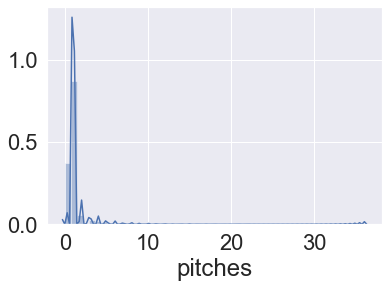

In [153]:
sns.distplot(df['pitches'])

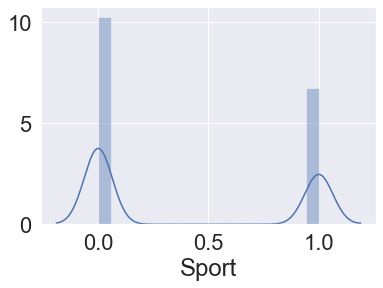

In [154]:
sns.distplot(df['Sport'])

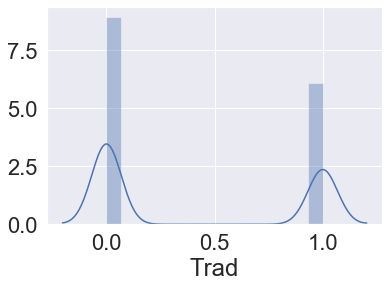

In [155]:
sns.distplot(df.loc[df['Boulder']==0,'Trad'])

In [156]:
df_numeric.loc[(df['Boulder']==0),'name'].count()

NameError: name 'df_numeric' is not defined

In [ ]:
df_numeric.loc[(df['Sport']==1)&(df_numeric['Trad']==1),'name'].count()

In [ ]:
df.danger.value_counts()

# climb_recommender

## Description
Content based climbing recommendation system. Information about ~36,000 climbs (mostly across North America) 
- User provides
 - Reference climb
 - Zip code, or city & state
 - Search radius
 - Program then displays reference climb details and top 10 matches
 
## Demo
- Video link(coming soon)
 
## Features
- General features include
- Difficulty Grade
 - 3rd class - 5.15d, V-easy - V16, etc.
 - Star rating
 - 1-5 stars
 - Type of climb
 - Sport, Trad, Bouldering, Alpine etc.
 - Pitches (length of the climb)
 
### Feature Engineering
 - Used route description for feature engineering
- NLP, LDA and domain knowledge to get keywords
 - Keywords used as features that describe the route
  - slab 
  - roof
  - crimp
  - crack
  - etc




## EDA 

### This is the general distribution on climbing types
![](figures/climb_type.png)

### This shows the counts for the amount of climbs containing keywords
![](figures/climb_style_type.png)

## Next Steps
- Build system that allows user to ask for match based on features rather than an actual climb
 - User selects
  - Difficulty rating, Sport/Trad, # of pitches
  - Keyword selection:
   - Crimp, crack, overhung, corner, slab etc
- Scrape additional websites for climb descriptions
- Rerun/tweak LDA to add in  topic modeling
- Create a user based recommendation system from mountain projects profiles
